<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/RandomForestHyper(GRIDcv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bioresearch.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.columns.value_counts()

,count
id,1
compactness_se,1
fractal_dimension_worst,1
symmetry_worst,1
concave points_worst,1
concavity_worst,1
compactness_worst,1
smoothness_worst,1
area_worst,1
perimeter_worst,1


In [ ]:
len(df.columns)

33

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.shape

(569, 33)

In [ ]:
# here diagnosis column is target column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# encoding is not required for RF independent variables but required for target variable

In [ ]:
df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].unique()[0]

'M'

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
# we need to remove last column unnamed and id column

In [ ]:
df=df.drop(columns=['id','Unnamed: 32'],axis=1)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
feature_space=df.drop('diagnosis',axis=1)

In [ ]:
feature_space.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
feature_space.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
feature_class=df['diagnosis']

In [ ]:
# splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature_space,feature_class,test_size=0.2,random_state=47)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fit_rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={

      'max_depth':[1,2,3,4,5,6,7,8]
      ,'max_leaf_nodes':[1,2,3,4,5,6,7,8],
      'criterion':['gini','entropy'],
      'n_estimators':[5,10,15,20,25,30],
      'max_features':['auto','sqrt','log2']
}

In [ ]:
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param)

In [ ]:
cv_rf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9600 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7680 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [43]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 7,
 'n_estimators': 20}

In [44]:
cv_rf.best_score_

0.9714492753623188

In [46]:
rf=RandomForestClassifier(criterion='entropy',
 max_depth=4,
 max_features= 'sqrt',
 max_leaf_nodes= 7,
 n_estimators=20)

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                       n_estimators=20)

In [49]:
y_pred=rf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [55]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [56]:
confusion_matrix(y_test,y_pred)

array([[66,  4],
       [ 2, 42]])

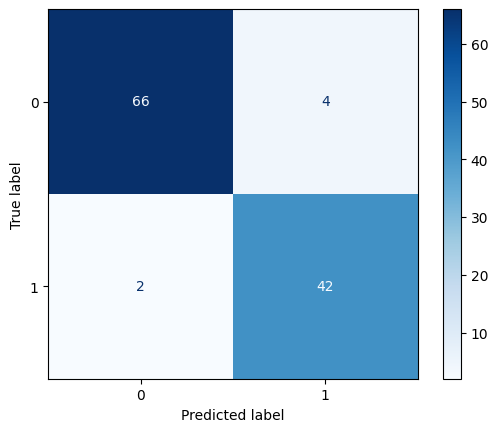

In [57]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues')

In [58]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.96        70\n           1       0.91      0.95      0.93        44\n\n    accuracy                           0.95       114\n   macro avg       0.94      0.95      0.94       114\nweighted avg       0.95      0.95      0.95       114\n'

In [65]:
x_test.iloc[:1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
114,8.726,15.83,55.84,230.9,0.115,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.1724,0.2364,0.2456,0.105,0.2926,0.1017


In [73]:
y_test.iloc[:1]

,diagnosis
114,0


In [66]:
x_test.iloc[:1].values

# last row all columns

array([[8.726e+00, 1.583e+01, 5.584e+01, 2.309e+02, 1.150e-01, 8.201e-02,
        4.132e-02, 1.924e-02, 1.649e-01, 7.633e-02, 1.665e-01, 5.864e-01,
        1.354e+00, 8.966e+00, 8.261e-03, 2.213e-02, 3.259e-02, 1.040e-02,
        1.708e-02, 3.806e-03, 9.628e+00, 1.962e+01, 6.448e+01, 2.844e+02,
        1.724e-01, 2.364e-01, 2.456e-01, 1.050e-01, 2.926e-01, 1.017e-01]])

In [67]:
new=list(x_test.iloc[:1].values)

In [68]:
y=cv_rf.predict(new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
y

array([0])

In [72]:
if y[0]==0:
  print('Benign')
else:
  print('Melanin')

Benign


In [ ]:
y_test.iloc[:1]

In [ ]:
# so it is predicting correct here